## 6.1 scipy的一些基本的应用
- 1. 求积分
- 2. 插值与拟合
- 3. 求解线性方程组
- 4. 优化
- 5. 统计功能

In [1]:
import scipy
scipy.__version__

### 求积分

In [4]:
import numpy as np
import scipy.integrate as sci
def f(x):
    return 1/pow(2*np.pi,0.5)*np.exp(-0.5*x**2)  #标准正态的密度函数

#自适应求积分
sci.quad(func=f,a=-1.645,b=1.645)
sci.quad(func=f,a=-1.96,b=1.96)
sci.quad(func=f,a=-2.58,b=2.58)
sci.quad(func=f,a=np.inf,b=0)
#固定高斯求积分
sci.fixed_quad(func=f,a=-1.645,b=1.645)
sci.fixed_quad(func=f,a=-1.96,b=1.96)
sci.fixed_quad(func=f,a=-2.58,b=2.58)
# 自适应高斯求积分
sci.quadrature(func=f,a=-1.0,b=1.0)
#自适应龙贝格求积分
sci.romberg(function=f,a=-1.645,b=1.645)

0.9000301889192873

### 插值与拟合

nearest [0.27344 0.27898 0.28382 0.2882  0.2882  0.30414 0.30414 0.31746]
zero [0.27344 0.27898 0.28382 0.2882  0.2882  0.30414 0.30414 0.31746]
slinear [0.27344 0.27898 0.28382 0.2882  0.29617 0.30414 0.3108  0.31746]
quadratic [0.27344    0.27898    0.28382    0.2882     0.29879098 0.30414
 0.31036301 0.31746   ]
cubic [0.27344    0.27898    0.28382    0.2882     0.29937206 0.30414
 0.30825294 0.31746   ]


Text(0.5,1,'用插值法求2年期和4年期的远期国债到期收益率')

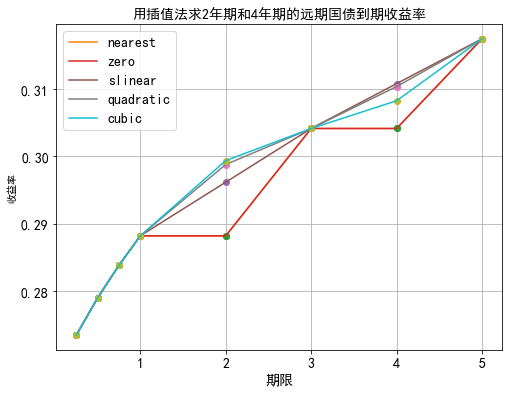

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False
from scipy import interpolate # 导入 SciPy 的子模块 interpolate
t=np.array ([0.25,0.5,0.75,1.0,3.0,5.0]) # 生成仅包含已有期限的数组
t_new=np.array ([0.25,0.5,0.75,1.0,2.0,3.0,4.0,5.0]) #生成包括 2 年和 4 年的新数组
rates=np.array([0.27344,0.27898,0.28382,0.2882,0.30414,0.31746]) #生成仅包含已有利率的数组
types=['nearest','zero','slinear','quadratic','cubic'] #生成包含插值方法的列表
plt.figure(figsize =(8,6))

for i in types:
    f=interpolate.interp1d(x=t,y=rates,kind=i)
    rates_new=f(t_new)
    print(i,rates_new)
    plt.plot(t_new,rates_new,'o')
    plt.plot(t_new,rates_new,'-',label=i)
    plt.xticks(fontsize=14)
    plt.xlabel(u'期限',fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylabel(u'收益率',rotation=90)
    plt.legend(loc=0,fontsize=14)
    plt.grid()
plt.title(u'用插值法求2年期和4年期的远期国债到期收益率',fontsize=14)

### 求解方程组

In [25]:
from scipy import linalg #导入 SciPy 的子模块 linalg
stock_return=np.array ([[0.003731,-0.001838,-0.003087,-0.024112],[0.021066,0.001842,-0.000344,0.011704],[-0.004854, -0.016544,-0.033391,-0.029563], [0.006098,-0.003738,0.007123,-0.01457]]) # 创建包含 4 只股票涨跌幅的数组
port_return=np.array([-0.0105654,0.0070534,-0.0256367,-0.0038289]) # 创建投资组合收益率的数组
weight=linalg.solve(a=stock_return,b=port_return ) #计算每只股票的权重
stock=np.array(['中国石油','工商银行','上汽集团','宝钢股份'])
for i in range(0,4):
    print(stock[i],round(weight[i],2))

中国石油 0.1
工商银行 0.2
上汽集团 0.3
宝钢股份 0.4


In [26]:
def g(w): #定义求解每只股票权重的方程组
    w1,w2,w3,w4 = w
    eq1=0.003731*w1-0.001838*w2-0.003087*w3-0.024112*w4+0.0105654 # 第一个等于0 的方程式
    eq2=0.021066*w1+0.001842*w2-0.000344*w3+0.011704*w4-0.0070534 # 第二个等于0 的方程式
    eq3=-0.004854*w1-0.016544*w2-0.033391*w3-0.029563*w4+0.0256367 # 第三个等于0 的方程式
    eq4=0.006098*w1-0.003738*w2+0.007123*w3-0.01457*w4+0.0038289 # 第四个等于0 的方程式
    return [eq1,eq2,eq3,eq4]
import scipy.optimize as sco #导入 SciPy 的子模块 optimize
result=sco.fsolve (g,[0.01,0.01,0.01,0.01]) #求方程组的解
result

array([0.1, 0.2, 0.3, 0.4])

### 优化

In [29]:
#计算最优投资权重

import scipy.optimize as sco
P=np.array ([590.01,5.29,26.67,6.50])  #股票价格
R=np.array([0.349032,0.155143,0.132796,0.055905])  #股票收益率
b=np.array ([1.64,1.41,1.21,1.06])  #股票贝塔值
def f(w):  #定义求最优值的函数
    w=np.array(w)
    return -np.sum(R*w)
cons=({'type':'eq','fun':lambda w: np.sum(w)-1},{'type':'ineq','fun':lambda w: 1.4-np.sum(w*b)})
bnds=((0,1),(0,1),(0,1),(0,1))
result=sco.minimize(f,[0.25,0.25,0.25,0.25], method="SLSQP",bounds= bnds,constraints =cons)
print(result)

In [36]:
# 计算得到该投资组合的收益率
print(result['x'].round(3))
print('该投资组合的最大收益率：',-f(result['x']).round(3))

[0.512 0.    0.287 0.201]
该投资组合的最大收益率： 0.228


In [38]:
# 计算每支股票的数量
shares=100000000 *result["x"]/P
shares=shares.round(0)   #结果去整数 因为最少是 1 股
print('贵州茅台的股数:',shares[0])
print('工商银行的股数:',shares[1])
print('上汽集团的股数:',shares[2])
print('宝钢股份的股数:',shares[3])

贵州茅台的股数: 86765.0
工商银行的股数: 0.0
上汽集团的股数: 1077018.0
宝钢股份的股数: 3089828.0


### 统计功能

In [41]:
import scipy.stats as ts
#describe函数和pandas的describe有相似之处
#可以求偏度、峰度、n阶矩等

## 6.2 StatsModels模块
此处运用Stats Model 模块主要是解决线性回归的问题

In [1]:
import statsmodels
statsmodels.__version__

'0.12.2'

In [1]:
import statsmodels.api as sm 
import pandas as pd
import os
os.chdir(r'd:/pystudy/金融数据分析/Chapter6')
ICBC_HS300=pd.read_excel('工商银行与沪深300指数.xlsx',sheet_name='Sheet1',header=0,index_col=0)

ICBC_HS300=ICBC_HS300.dropna() #删除缺失值
Y=ICBC_HS300.iloc[:,0]
X=ICBC_HS300.iloc[:,1]
X_addcons=sm.add_constant(X)
model=sm.OLS(endog=Y,exog=X_addcons) #构建普通最小二乘法的线性归模型
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   ICBC   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     281.2
Date:                Fri, 07 May 2021   Prob (F-statistic):           1.29e-53
Time:                        15:19:36   Log-Likelihood:                 2302.7
No. Observations:                 731   AIC:                            -4601.
Df Residuals:                     729   BIC:                            -4592.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.000      1.521      0.129      -0.000       0.001
HS300          0.5449      0.032     16.768      0.000       0.481       0.609
==============================================================================
Omnibus:                       90.243   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              420.477
Skew:                           0.451   Prob(JB):                     4.95e-92
Kurtosis:                       6.604   Cond. No.                         84.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

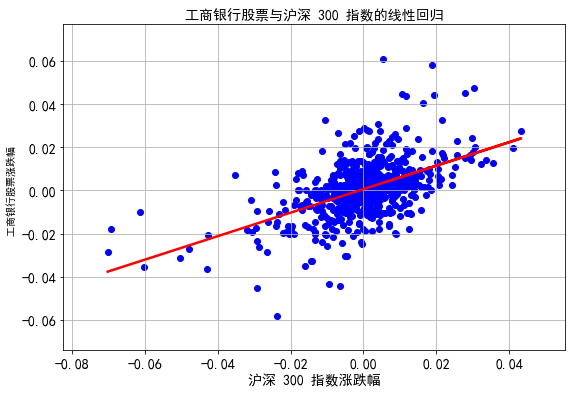

In [8]:
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False

plt.figure(figsize =(9,6))
plt.scatter(X,Y,c="b",marker='o')
plt.plot(X,result.params[0]+result.params[1]*X,'r-',lw=2.5) #生成拟合的一条直线
plt.xticks(fontsize =14)
plt.xlabel(u'沪深 300 指数涨跌幅',fontsize=14)
plt.yticks(fontsize =14)
plt.ylabel(u'工商银行股票涨跌幅 ',rotation=90)
plt.title(u'工商银行股票与沪深 300 指数的线性回归',fontsize =14)
plt.grid()

## 6.3 波动率模型和arch模块（略）

In [1]:
1+2

3